# Multivariate normal example
The code here visualizes the result from the `mvn_example.cpp` code.

- \# of particles = 10
- \# of iterations = 1000
- Kernel function = RBF with median scale method
- Optimizer = AdaGrad with learning rate=0.1 and $\epsilon$=1e-8

The example MVN has a mean and covariance matrix of (hardcoded in `mvn_example.cpp`):
$$
\mu = \begin{bmatrix} -0.6871 \\ 0.8010 \end{bmatrix},\, \Sigma = 5 \begin{bmatrix} 0.2260 & 0.1652 \\ 0.1652 & 0.6779 \end{bmatrix} = \begin{bmatrix} 1.13 & 0.826 \\ 0.826 & 3.3895 \end{bmatrix}
$$
which looks like the following:

In [1]:
import subprocess
import numpy as np
import plotly.graph_objects as go
import scipy.stats as stats
import plotly.io as pio
pio.renderers.default = "jupyterlab+png"

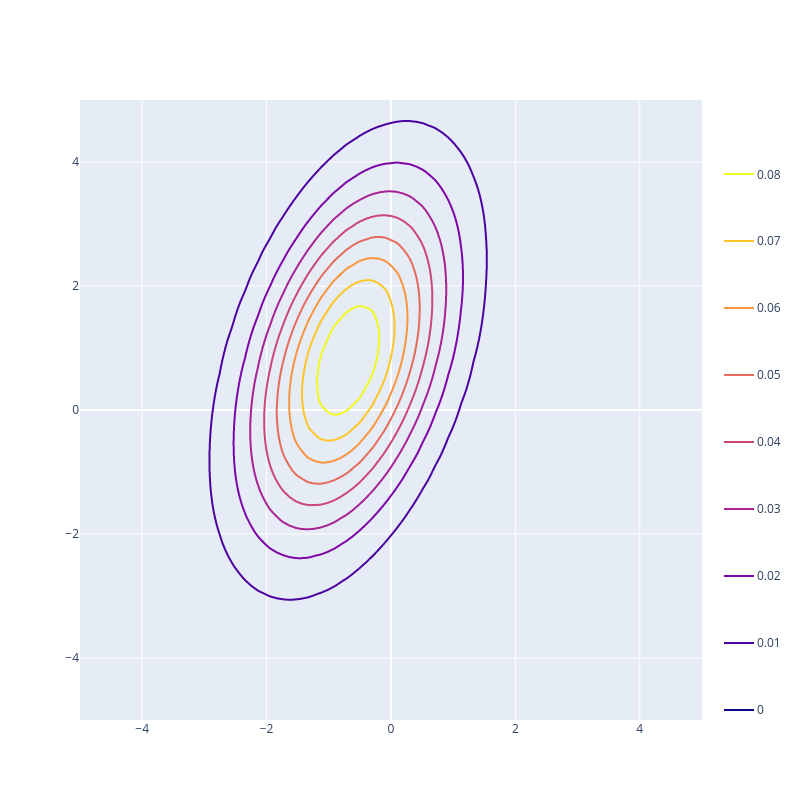

In [2]:
# Create the support
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

support = np.empty(X.shape + (2,))
support[:, :, 0] = X
support[:, :, 1] = Y

# Define the multivariate normal
mu = [-0.6871, 0.801]
sigma = [[1.13, 0.826], [0.826, 3.3895]]
mvn = stats.multivariate_normal(mu, sigma)

# Compute the densities
pdf = mvn.pdf(support)

# Plot the multivariate normal
fig = go.Figure(
    data=go.Contour(
        z=pdf,
        x=x,
        y=y,
        name="2-D MVN contour",
        contours_coloring='lines',
        line_width=2
    ),
    layout={
        "width": 800,
        "height": 800
    }
)

fig.show()

The particles are given random initial positions and with SVGD they 'move' to estimate the MVN.

_The code snippet below simply executes the `mvn_example` binary built from `mvn_example.cpp` and plots the initial and final positions of the particles._

Initial particle positions:
 [[ 2.04113   -0.633702 ]
 [ 1.6986     1.79064  ]
 [ 2.46988   -1.81469  ]
 [-0.988663   1.60938  ]
 [-1.33335    0.32382  ]
 [-0.135618   0.773226 ]
 [-0.811293   0.0804055]
 [ 2.71338    2.49717  ]
 [ 0.81427    1.30378  ]
 [-2.15038    0.641813 ]]
Final particle positions:
 [[ 0.469815   1.16686  ]
 [-0.184629   1.82829  ]
 [ 0.0827075 -0.375293 ]
 [-1.04192    2.64404  ]
 [-0.946601  -0.148336 ]
 [-1.73173    1.15547  ]
 [-1.14872   -1.79038  ]
 [ 0.452507   3.21318  ]
 [-0.791678   0.828686 ]
 [-2.05712   -0.556122 ]]


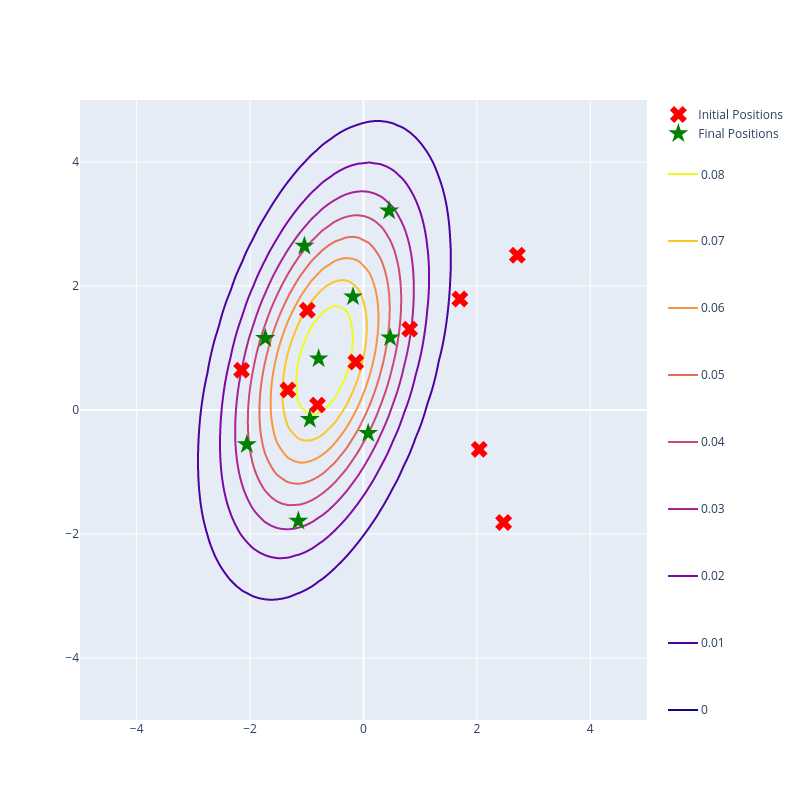

In [3]:
# Run the executable
captured_output = subprocess.run("./mvn_example", text=True, capture_output=True)

# Process the captured output
split_output_str =  captured_output.stdout.split("\n")

# Extract the particle positions
initial_positions_x = [float(elem) for elem in split_output_str[1].split(" ") if elem != ""]
initial_positions_y = [float(elem) for elem in split_output_str[2].split(" ") if elem != ""]
initial_positions = list(zip(initial_positions_x, initial_positions_y))

final_positions_x = [float(elem) for elem in split_output_str[4].split(" ") if elem != ""]
final_positions_y = [float(elem) for elem in split_output_str[5].split(" ") if elem != ""]
final_positions = list(zip(final_positions_x, final_positions_y))

print("Initial particle positions:\n", np.asarray(initial_positions))
print("Final particle positions:\n", np.asarray(final_positions))

# Plot the positions on top of the MVN
fig.add_traces(
    [
        go.Scatter(
            x=initial_positions_x,
            y=initial_positions_y,
            mode="markers",
            marker_symbol="x",
            marker_size=15,
            marker_color="red",
            name="Initial Positions"
        ),
        go.Scatter(
            x=final_positions_x,
            y=final_positions_y,
            mode="markers",
            marker_symbol="star",
            marker_size=15,
            marker_color="green",
            name="Final Positions"
        )
    ]
)

fig.show()